# Dataset
In this notebook we'll perform tests on the SIS Dataset.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')

from examples.community.semantic_image_synthesis.sis_dataset import SISDataset,CELEBAHQ_DICT

img_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/img/"
ann_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/mask/"
# with
dataset = SISDataset(
        image_dir_path=img_dir_path,
        ann_dir_path=ann_dir_path,
        img_size=64,
        cls_dict=CELEBAHQ_DICT,
        nmax=100)

/home/f296849/miniconda3/Bib/envs/diffusers_dev/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [00:00<00:00, 146.62it/s]


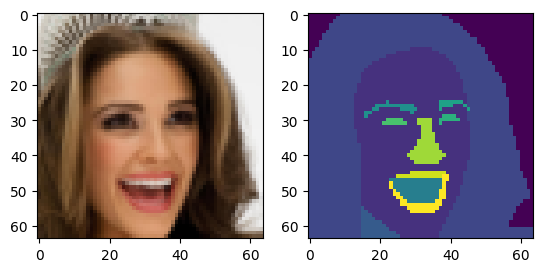

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots(1,2)
x,y,name = dataset[0]
x_np = np.array(255*(x+1)/2,dtype=np.uint8).transpose(1,2,0)
ax[0].imshow(x_np,vmax=255)
ax[1].imshow(y)
plt.show()

## Scheduler DDPM
In this part, we'll have a look on the behavior of DDPM Scheduler...

In [3]:
from diffusers import DDPMScheduler
noise_scheduler = DDPMScheduler(beta_schedule='squaredcos_cap_v2')
print(noise_scheduler.config.num_train_timesteps)

1000


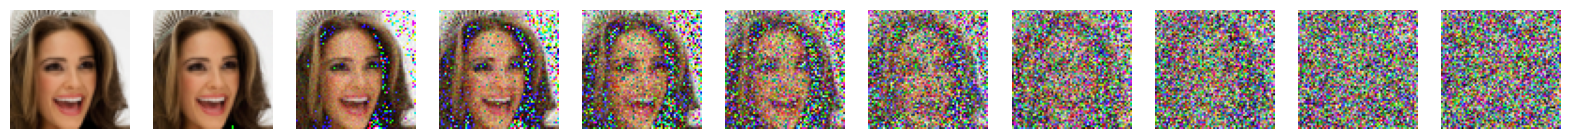

In [6]:
import torch
n_steps = 10
x_n = x.unsqueeze(0).repeat_interleave(n_steps,dim=0)
noise = torch.randn_like(x_n)
timesteps = torch.linspace(0,500,n_steps).long()
noisy_image = noise_scheduler.add_noise(x_n,noise,timesteps)

images = torch.cat([x.unsqueeze(0),noisy_image],dim=0)
fig,ax = plt.subplots(1,len(images),figsize=(20,2))
for i,im in enumerate(images):
    ax[i].imshow(np.array(127.5*(im+1),dtype=np.uint8).transpose(1,2,0),vmax=255)
    ax[i].axis('off')
plt.show()

In [7]:
timesteps

tensor([  1,  23,  45,  67,  89, 111, 133, 155, 177, 200])

In [14]:
print((noisy_image[5]-x_n).mean())
print((noisy_image[5]-x_n).std())

tensor(0.0095)
tensor(0.3616)
